In [1]:
print("value")

value


In [1]:
# impetinf the packages fr analysis
import pandas as pd     
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()


In [14]:
#now loading the data 

data=pd.read_csv(r"C:\Prject\Data analysis\Netflix Data Analysis\netflix_titles_data.csv\netflix_titles.csv")

## exploring the data

In [15]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [16]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [28]:
print(data.describe())

print(data.info())

            show_id  release_year
count  6.234000e+03    6234.00000
mean   7.670368e+07    2013.35932
std    1.094296e+07       8.81162
min    2.477470e+05    1925.00000
25%    8.003580e+07    2013.00000
50%    8.016337e+07    2016.00000
75%    8.024489e+07    2018.00000
max    8.123573e+07    2020.00000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object

In [30]:
# lets check for null unique values and duplicates
data.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [34]:
data.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [36]:
data.duplicated().sum()

np.int64(0)

In [39]:
# for safety lets create a copy of the data and do the cleaning there

data_copy=data.copy()

print(data_copy.shape)
#letsa rop null values rows
data_copy.dropna(inplace=True)

print(data_copy.isnull().sum())

print(data_copy.shape)

data_copy.head()

(6234, 12)
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
(3774, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [61]:
# lets correct the format of the ate that is in object format

data_copy['date_added'] = pd.to_datetime(
    data_copy['date_added'].astype(str).str.strip(), 
    format='%B %d, %Y', 
    errors='coerce'
)


In [76]:
data_copy['day_added'] = data_copy['date_added'].dt.day
data_copy['month_added'] = data_copy['date_added'].dt.month
data_copy['year_added'] = data_copy['date_added'].dt.year
data_copy['year_added'].astype(int);
data_copy['day_added'].astype(int);

data_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,9,2019
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,8,9,2017
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",8,9,2017
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,8,9,2017
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,8,9,2017


In [77]:
col=data_copy.columns

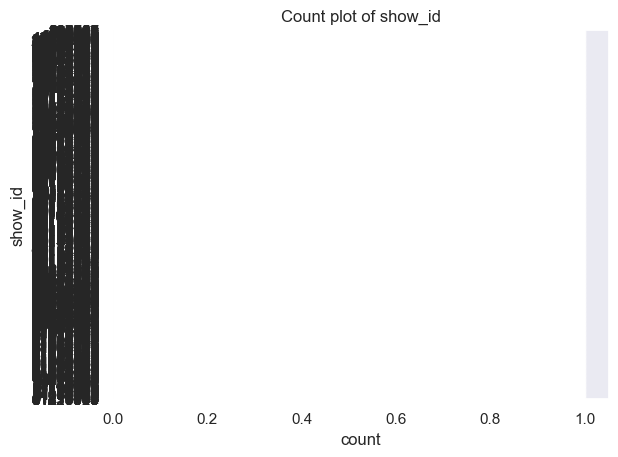

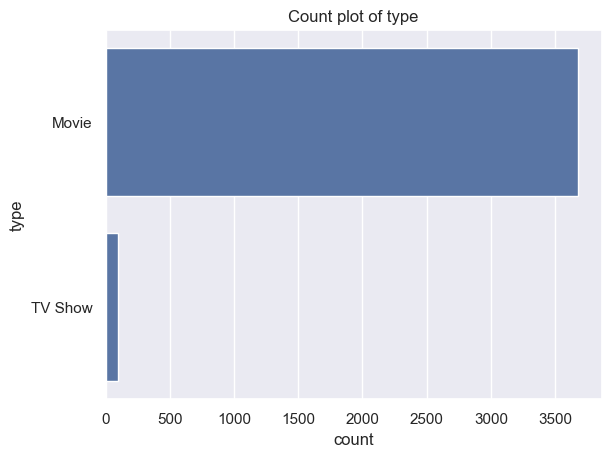

c:\Prject\Data analysis\Netflix Data Analysis\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Prject\Data analysis\Netflix Data Analysis\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Prject\Data analysis\Netflix Data Analysis\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Prject\Data analysis\Netflix Data Analysis\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Prject\Data analysis\Netflix Data Analysis\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWar

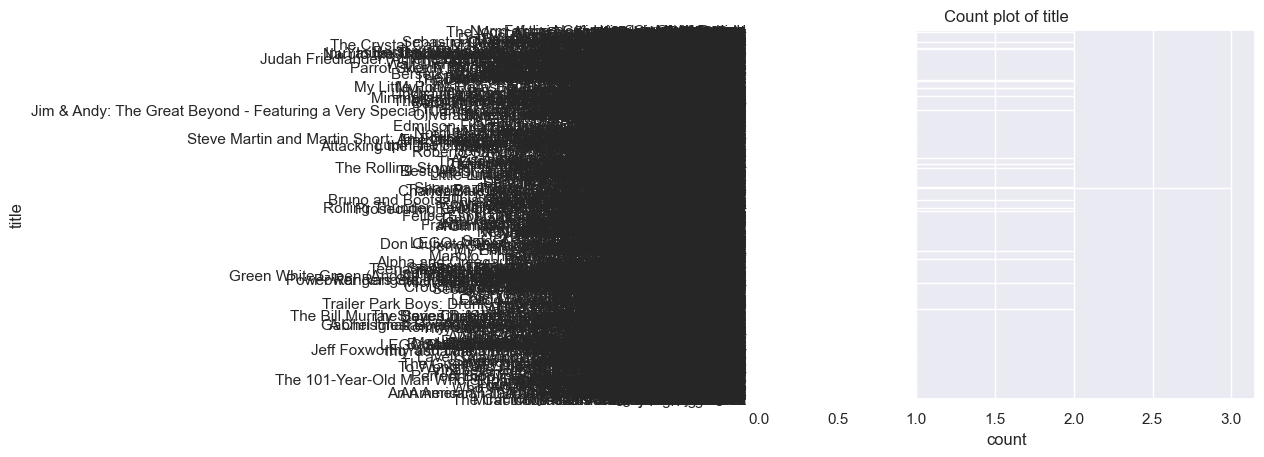

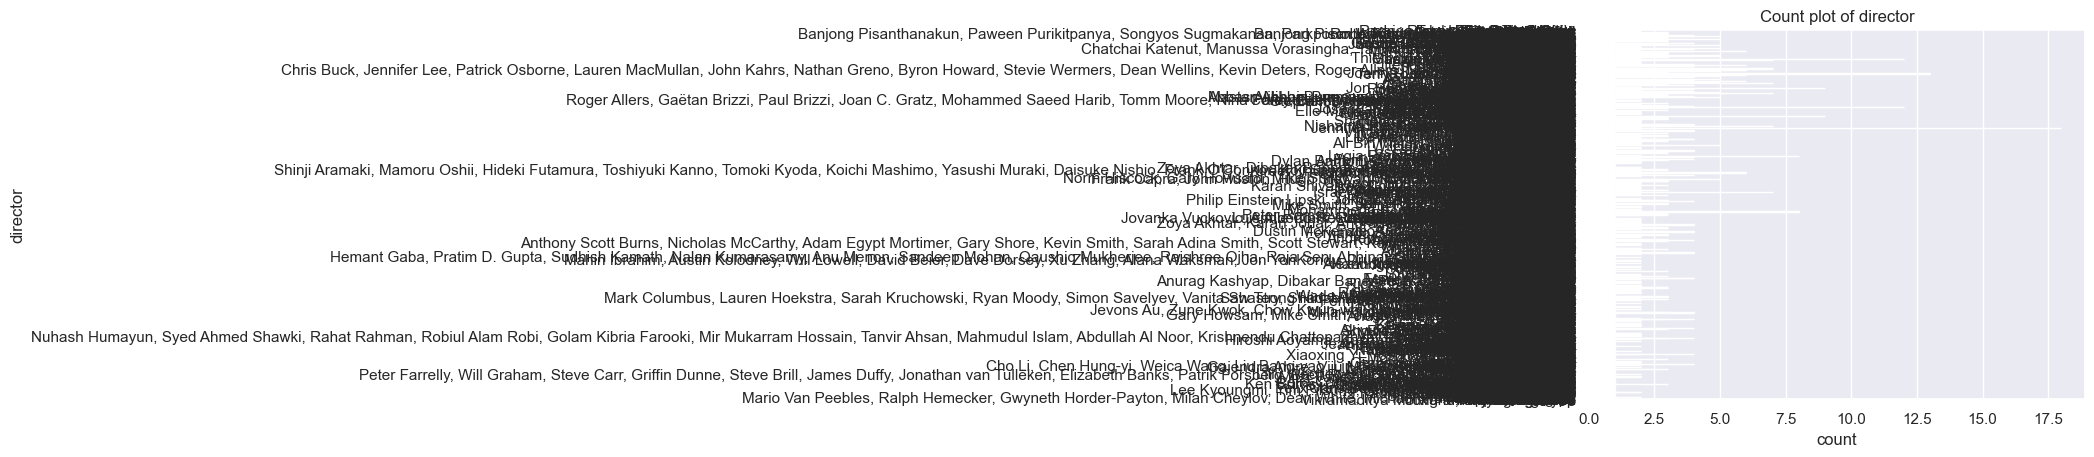

c:\Prject\Data analysis\Netflix Data Analysis\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


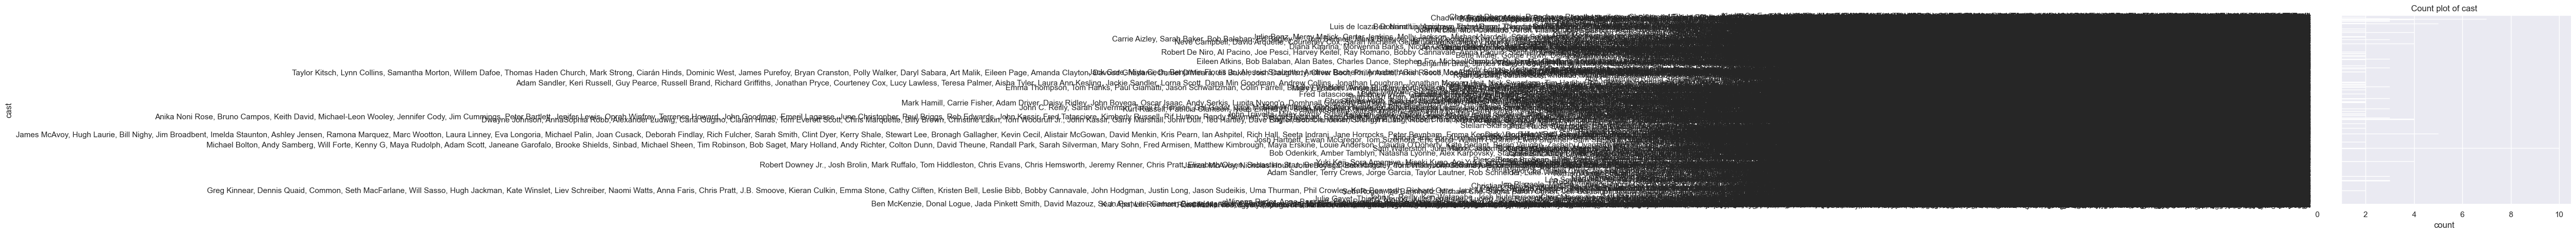

KeyboardInterrupt: 

In [ ]:
# lets do count of everything in the columns
for i in col:
    sns.countplot(y=i,data=data_copy)
    plt.title(f'Count plot of {i}')
    plt.show()

Text(0.5, 1.0, 'Type')

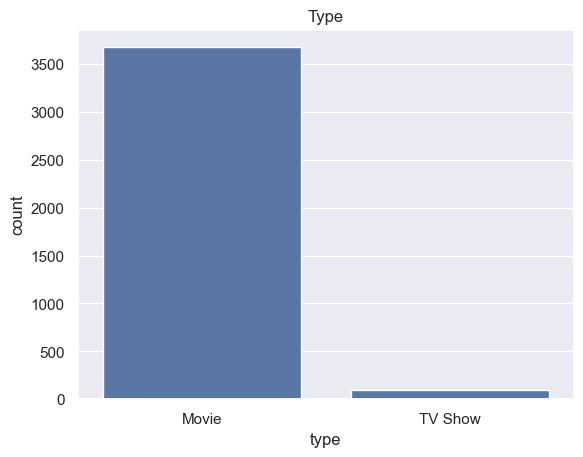

In [81]:
sns.countplot(x=data_copy['type'],data=data_copy)
plt.title('Type')

C:\Users\athun\AppData\Local\Temp\ipykernel_13920\731052618.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=data_copy['rating'],data=data_copy,palette='coolwarm')


Text(0.5, 1.0, 'Distribution of Netflix Content Ratings')

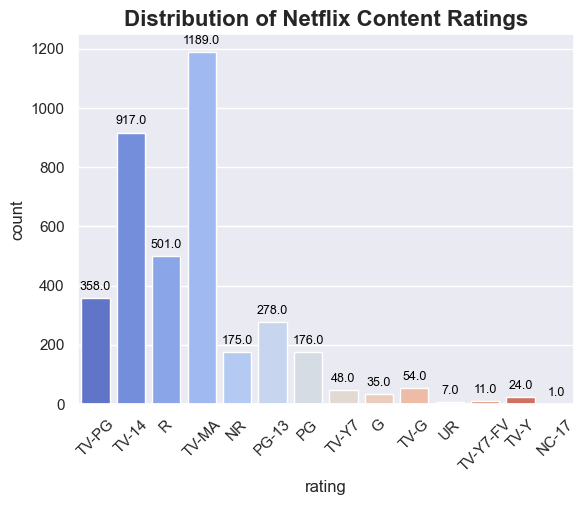

In [102]:
# lets do it for rating
ax=sns.countplot(x=data_copy['rating'],data=data_copy,palette='coolwarm')


for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 8), 
        textcoords='offset points',
        fontsize=9, color='black'
    )
    
    
plt.xticks(rotation=45)

plt.title("Distribution of Netflix Content Ratings", fontsize=16, weight='bold')

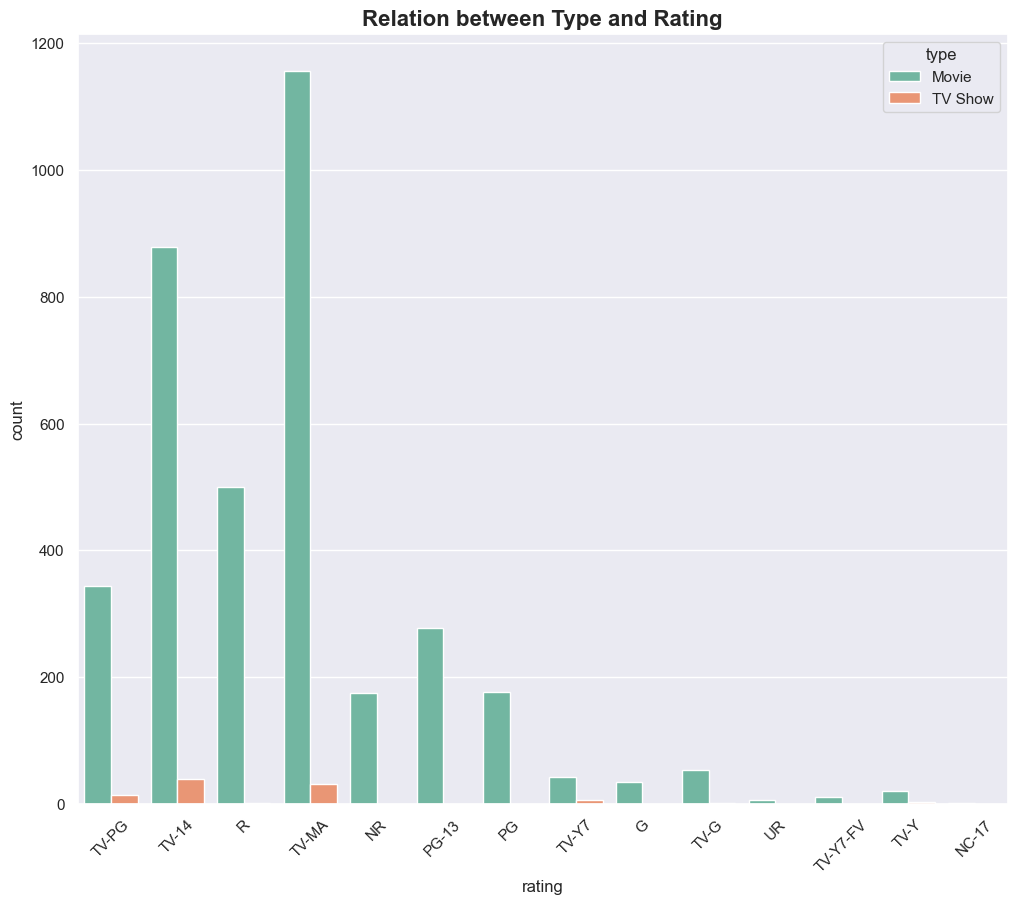

<Figure size 640x480 with 0 Axes>

In [120]:
# Relation between Type and Rating

plt.figure(figsize=(12,10))
sns.countplot(x='rating',hue='type',data=data_copy,palette='Set2')
plt.xticks(rotation=45)
plt.title("Relation between Type and Rating", fontsize=16, weight='bold')
plt.show()
plt.savefig("Relation between Type and Rating")


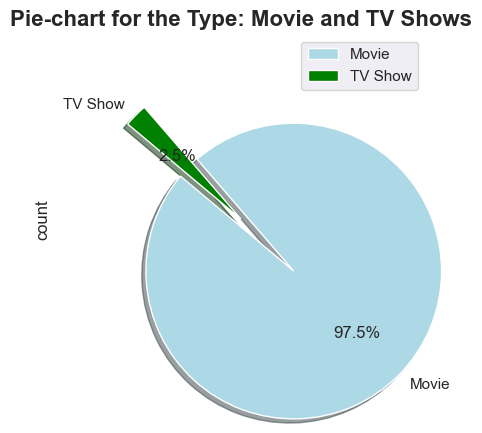

In [100]:
#Pie-chart for the Type: Movie and TV Shows

data_copy['type'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[.5,.001],startangle=140,colors=['lightblue','green'])
plt.title('Pie-chart for the Type: Movie and TV Shows', fontsize=16, weight='bold')
plt.legend()
plt.show()


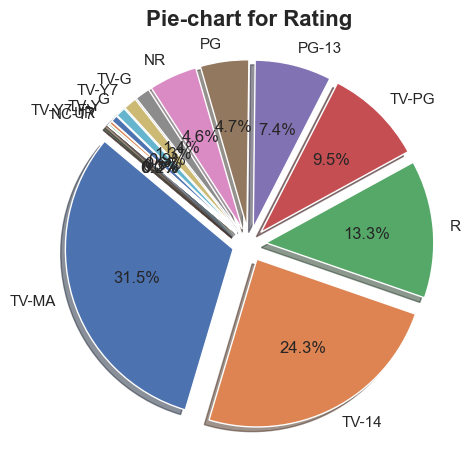

In [112]:
#  Pie-chart for Rating

counts = data_copy['rating'].value_counts()

# Create explode list: same length as counts
explode = [0.1] * len(counts)   # explode all
# OR explode only the first slice, rest 0:
# explode = [0.1] + [0]*(len(counts)-1)


data_copy['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=explode,startangle=140)
plt.title('Pie-chart for Rating', fontsize=16, weight='bold')   
plt.ylabel("")  # removes the default ylabel
plt.tight_layout()
plt.show()


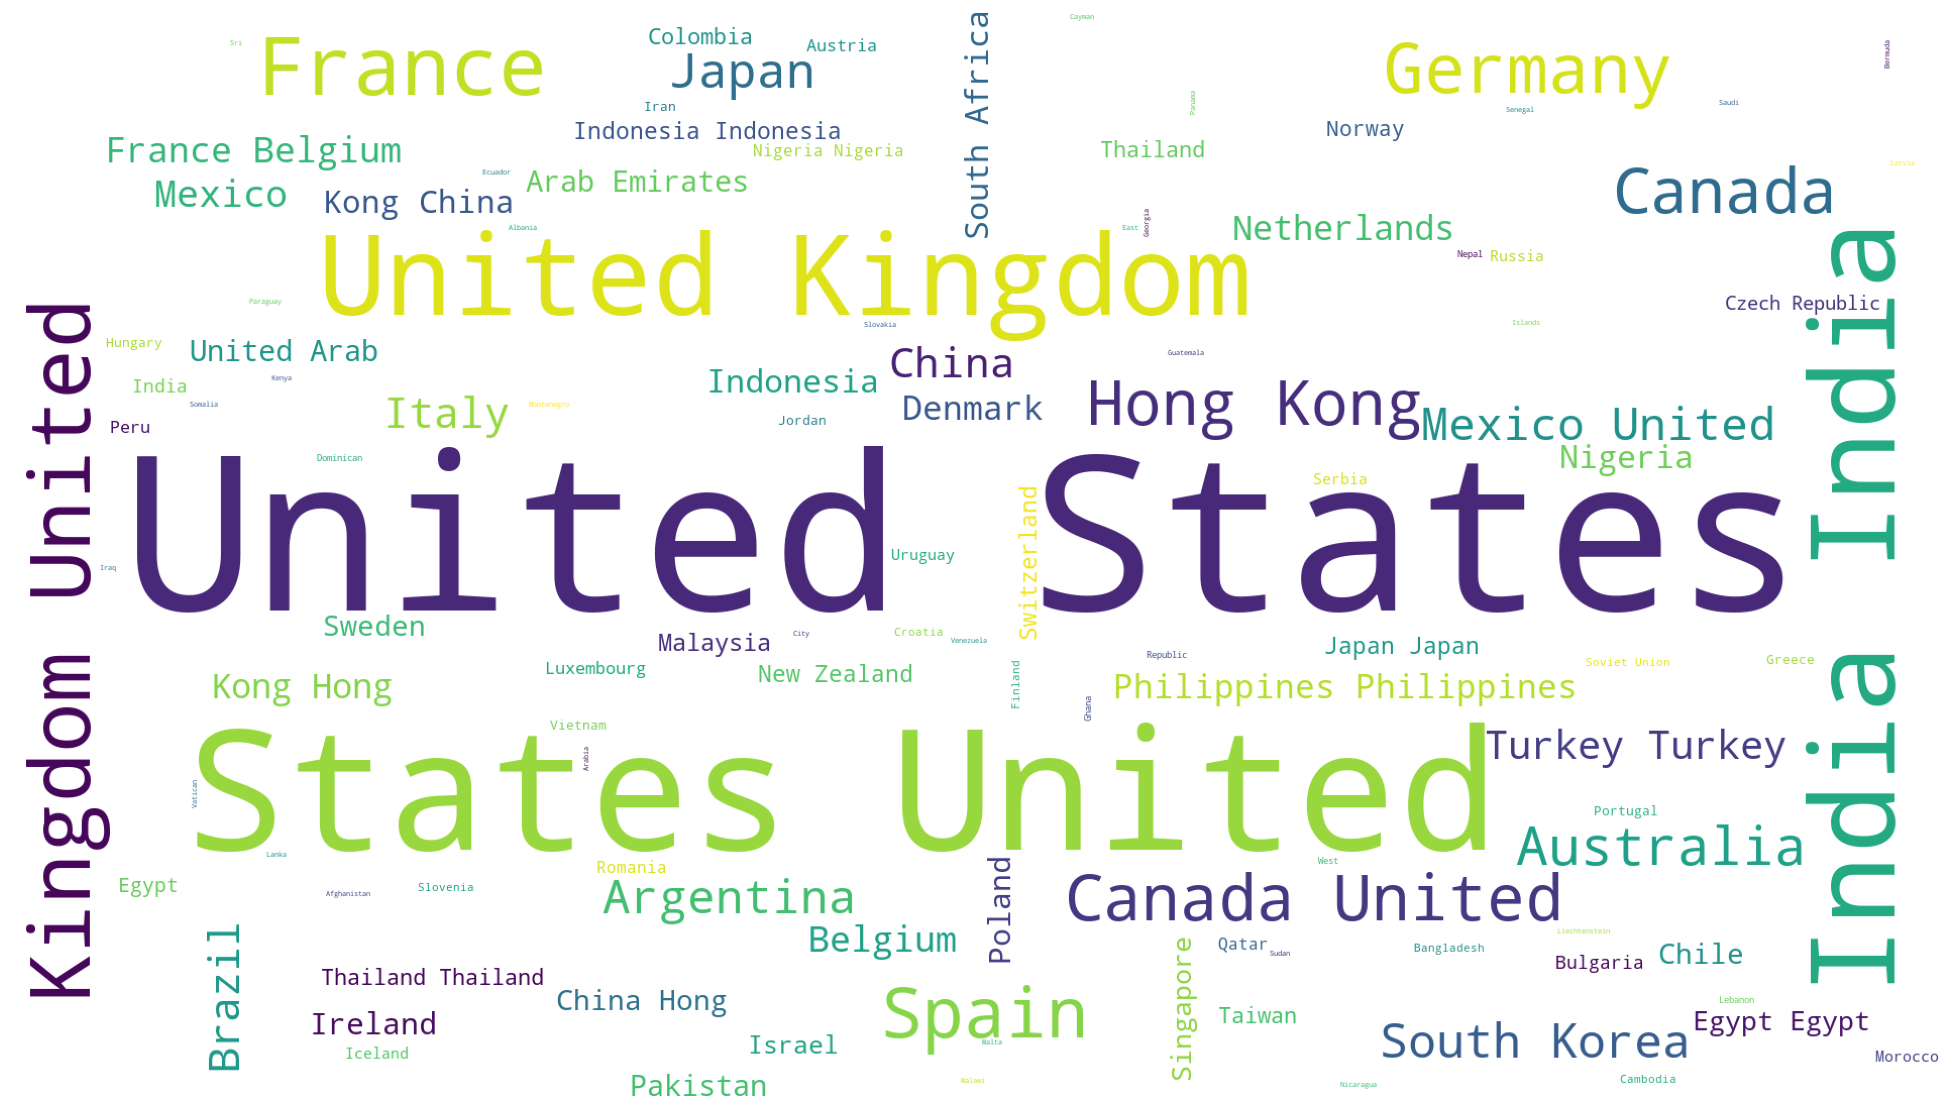

In [116]:
#wordcloud for country

from wordcloud import WordCloud

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data_copy.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

In [119]:
data_copy.to_csv(r"C:\Prject\Data analysis\Netflix Data Analysis\netflix_titles_data.csv\clean_netflix_data.csv", index=False)
data_copy.to_excel(r"C:\Prject\Data analysis\Netflix Data Analysis\netflix_titles_data.csv\clean_netflix_data.xlsx", index=False)

